In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [4]:
data=pd.read_csv('ToyotaCorolla.csv',encoding='latin')

In [5]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [6]:
data=data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
data1=data.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)

In [8]:
data1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   CC      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [10]:
data1.isna().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [11]:
data1.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [13]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=data1).fit()

In [14]:
model.params

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
CC             -0.121100
Doors          -1.616641
Gears         594.319936
QT              3.949081
Weight         16.958632
dtype: float64

In [15]:
model.tvalues, '\n', model.pvalues

(Intercept    -3.948666
 Age         -46.511852
 KM          -16.621622
 HP           11.241018
 CC           -1.344222
 Doors        -0.040410
 Gears         3.016007
 QT            3.014535
 Weight       15.879803
 dtype: float64,
 '\n',
 Intercept     8.241949e-05
 Age          3.354724e-288
 KM            7.538439e-57
 HP            3.757218e-28
 CC            1.790902e-01
 Doors         9.677716e-01
 Gears         2.606549e-03
 QT            2.619148e-03
 Weight        2.048576e-52
 dtype: float64)

In [16]:
model.rsquared,model.rsquared_adj

(0.8637627463428192, 0.8629989775766963)

In [17]:
rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=data1).fit().rsquared
vif_age=1/(1-rsq_age)

In [18]:
rsq_km=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=data1).fit().rsquared
vif_km=1/(1-rsq_km)

In [19]:
rsq_hp=smf.ols('HP~KM+Age+CC+Doors+Gears+QT+Weight',data=data1).fit().rsquared
vif_hp=1/(1-rsq_hp)

In [20]:
rsq_cc=smf.ols('CC~KM+HP+Age+Doors+Gears+QT+Weight',data=data1).fit().rsquared
vif_cc=1/(1-rsq_cc)

In [21]:
rsq_doors=smf.ols('Doors~KM+HP+CC+Age+Gears+QT+Weight',data=data1).fit().rsquared
vif_doors=1/(1-rsq_doors)

In [22]:
rsq_gears=smf.ols('Gears~KM+HP+CC+Doors+Age+QT+Weight',data=data1).fit().rsquared
vif_gears=1/(1-rsq_gears)

In [23]:
rsq_qt=smf.ols('QT~KM+HP+CC+Doors+Gears+Age+Weight',data=data1).fit().rsquared
vif_qt=1/(1-rsq_qt)

In [25]:
rsq_weight=smf.ols('Weight~KM+HP+CC+Doors+Gears+QT+Age',data=data1).fit().rsquared
vif_weight=1/(1-rsq_weight)

In [26]:
d={'variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qt,vif_weight]}

In [28]:
vif_frame=pd.DataFrame(d)

In [29]:
vif_frame

,variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,CC,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QT,2.311431
7,Weight,2.516420


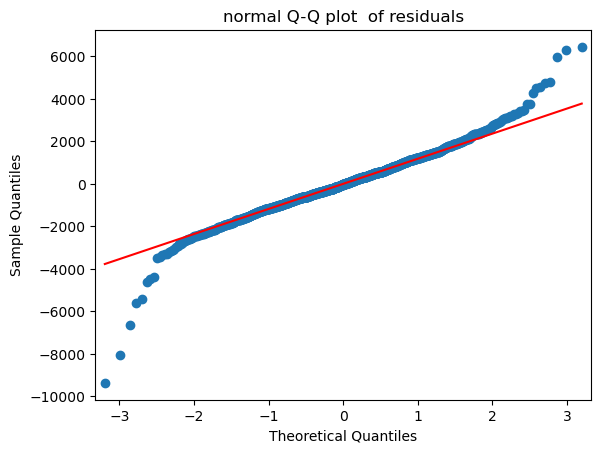

In [32]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title('normal Q-Q plot  of residuals')
plt.show()

In [34]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

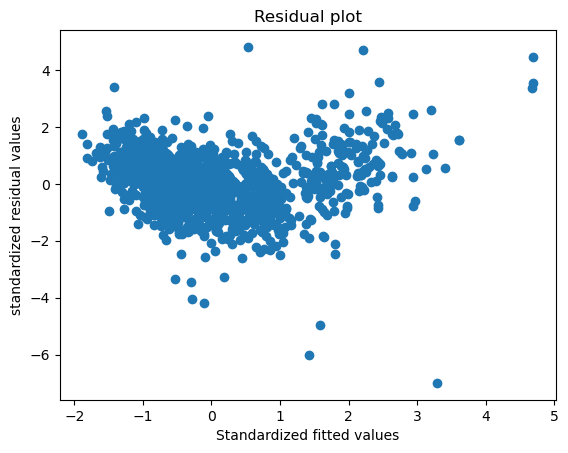

In [35]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

eval_env: 1


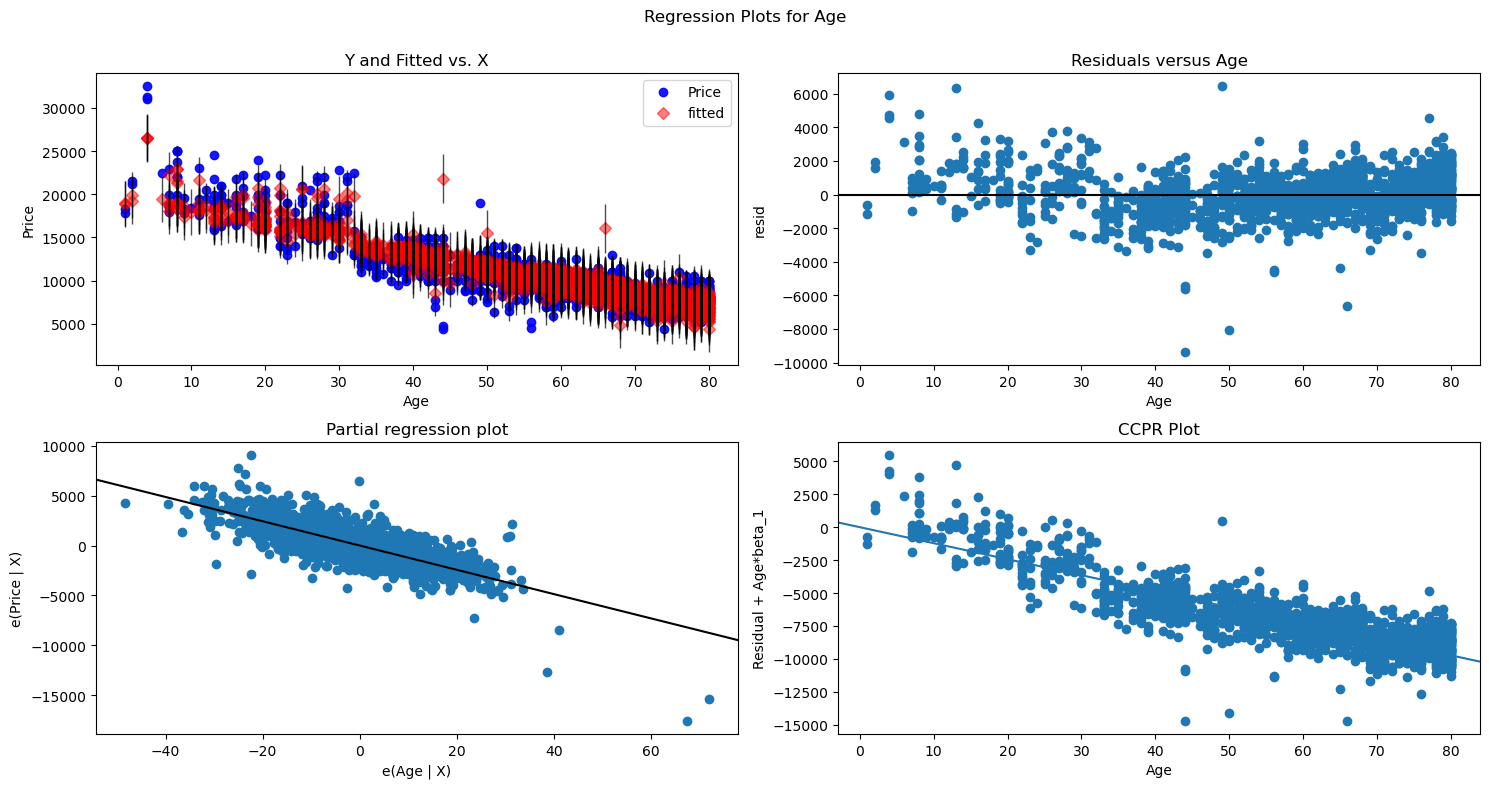

In [39]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

eval_env: 1


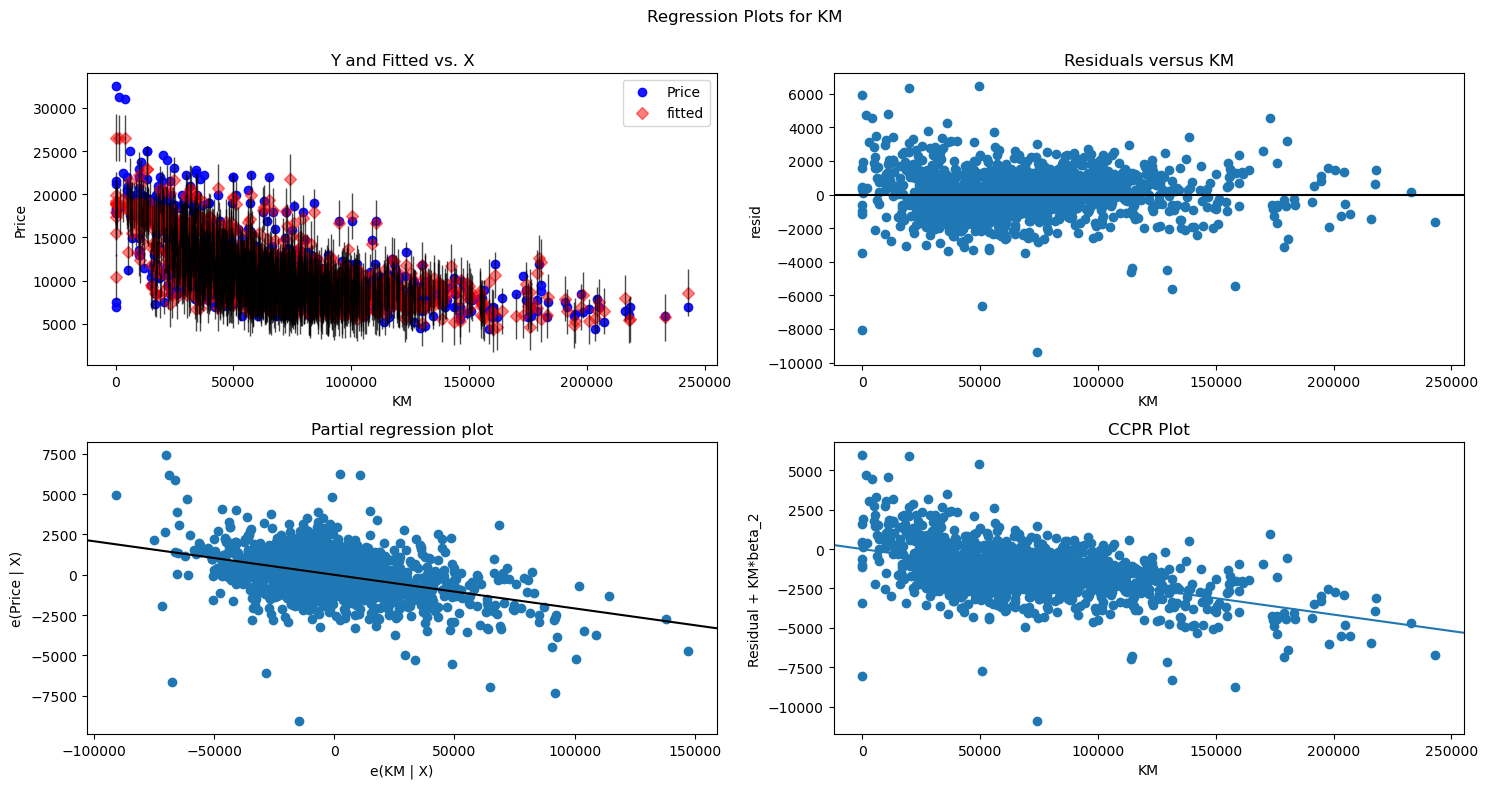

In [40]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


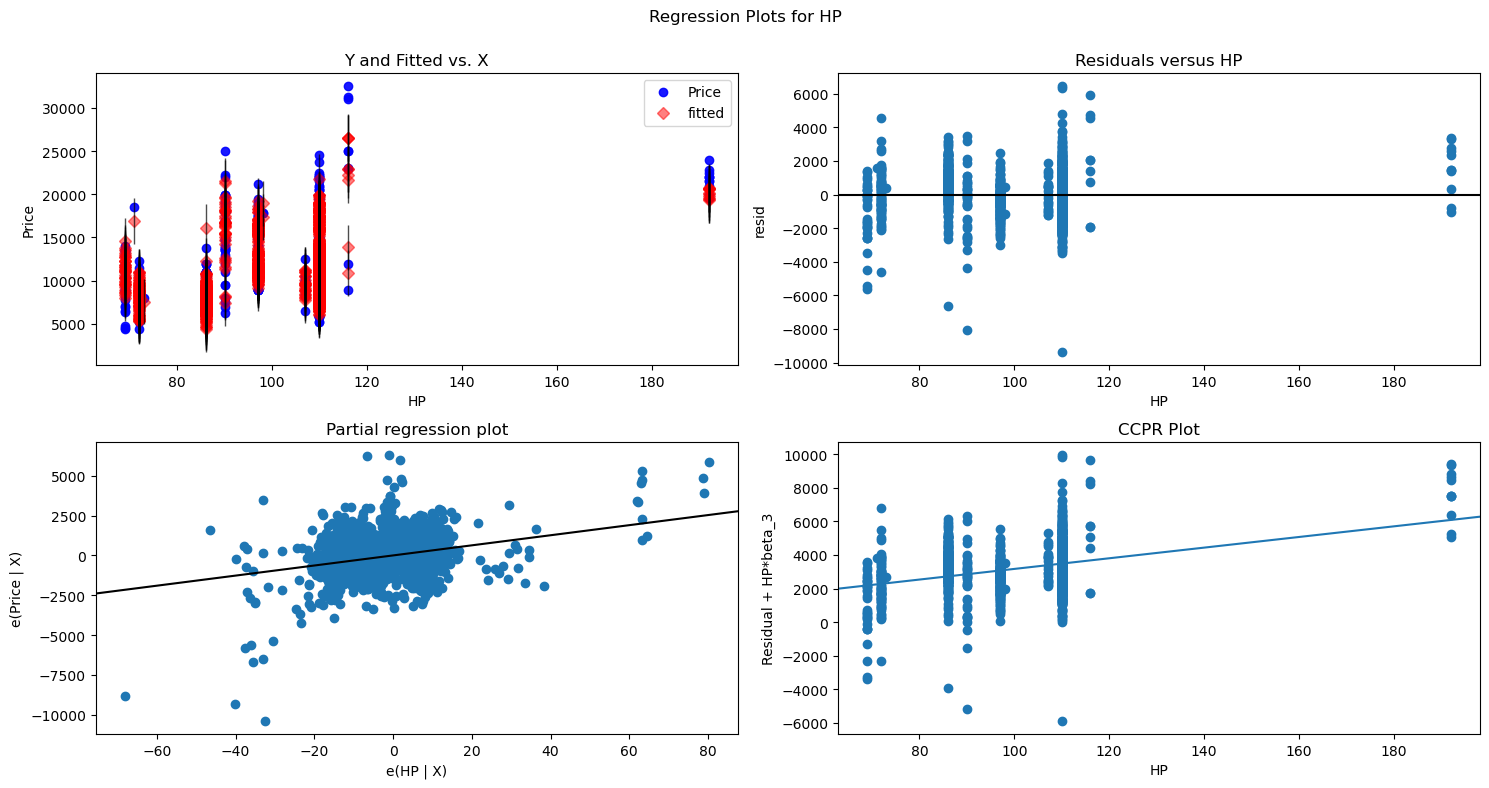

In [41]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


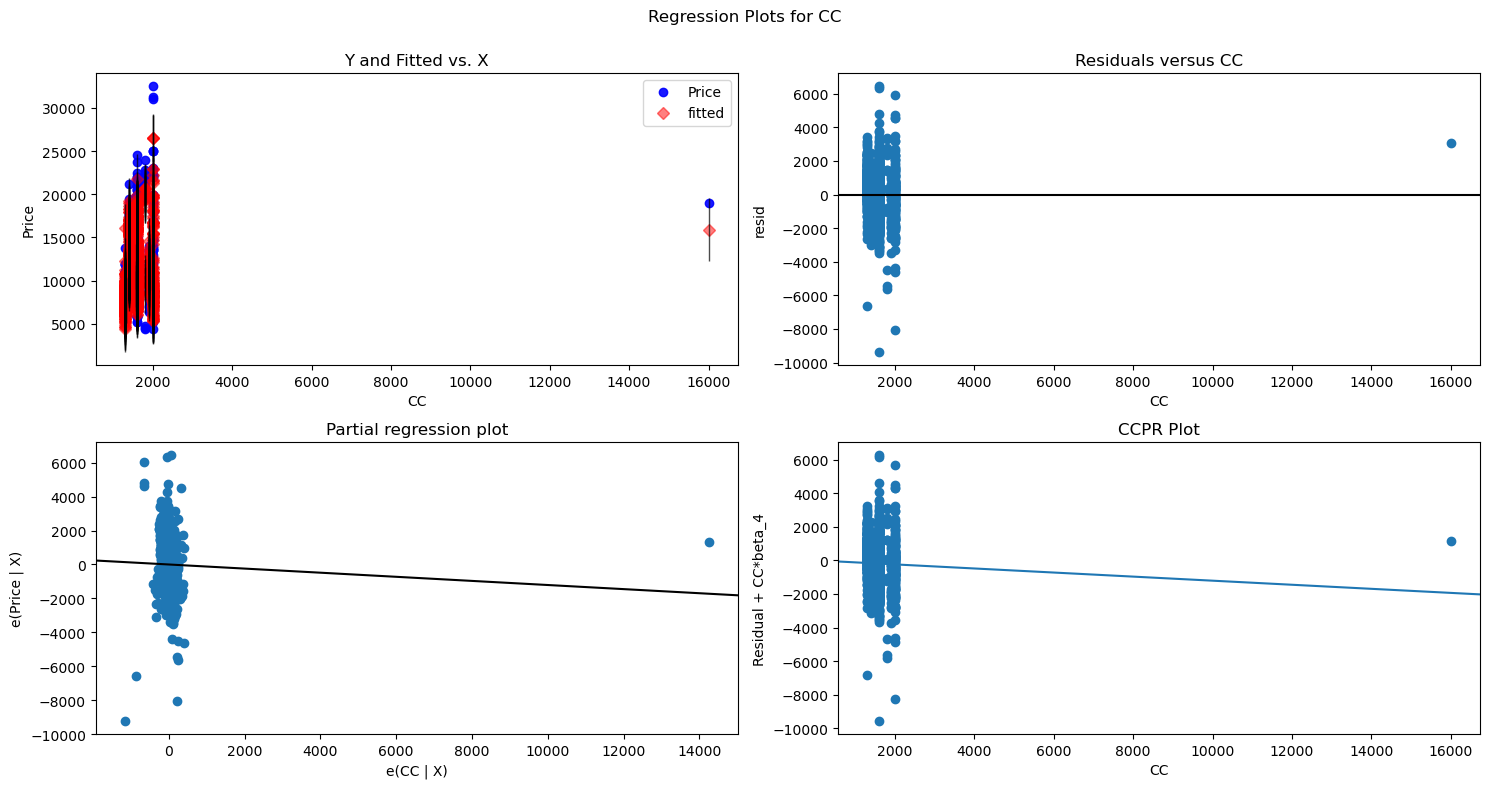

In [42]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

eval_env: 1


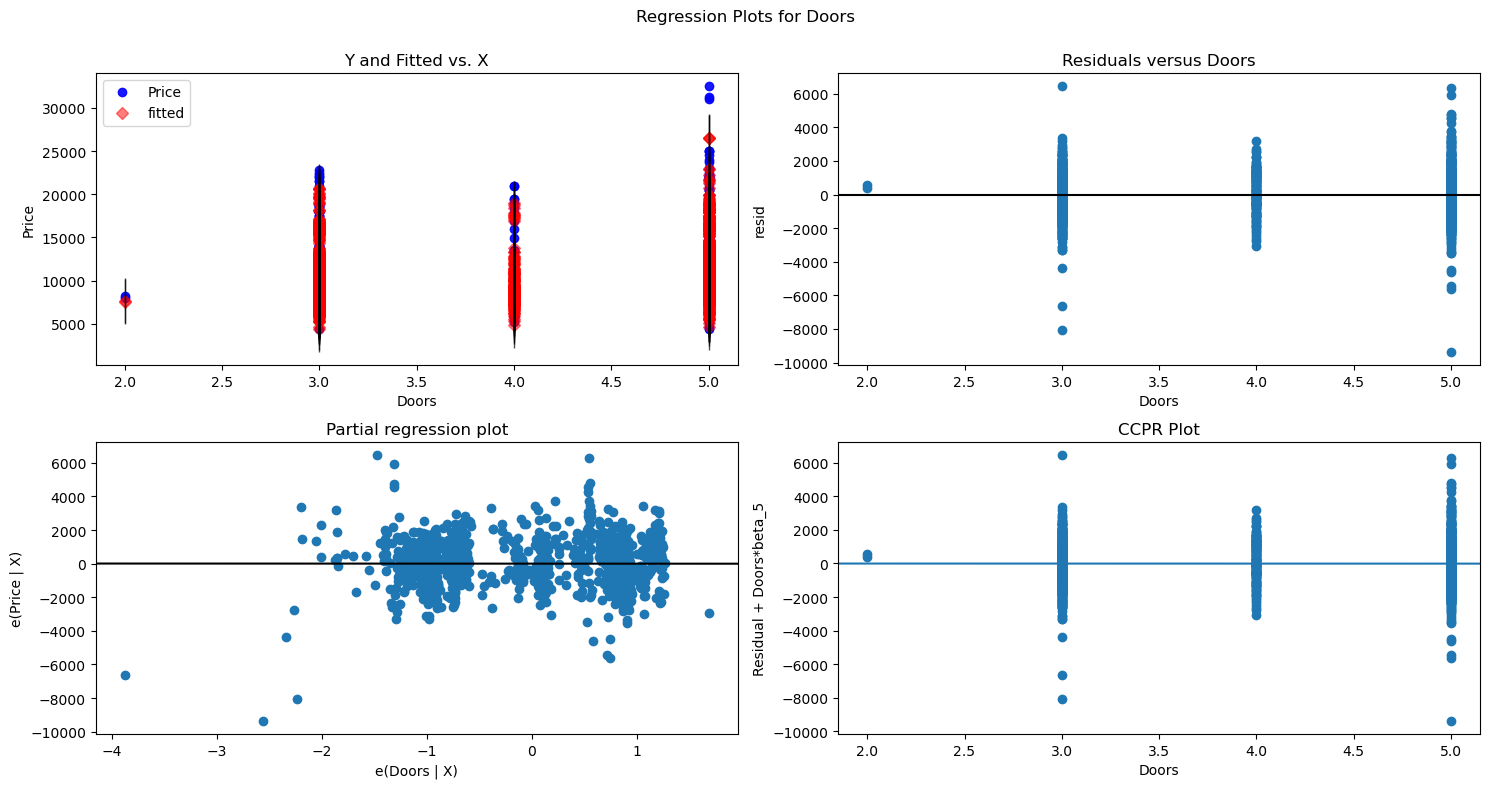

In [43]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


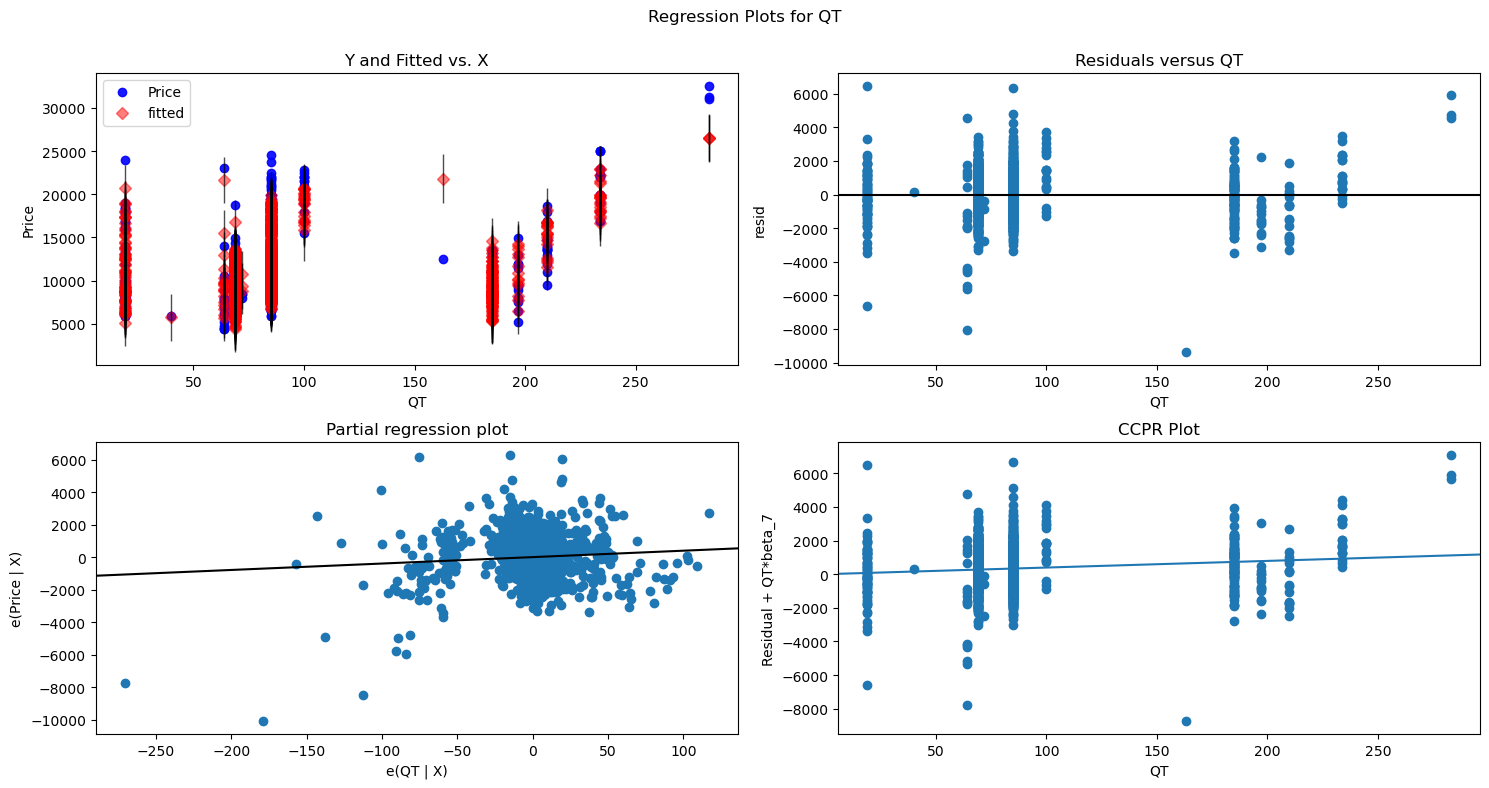

In [44]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

eval_env: 1


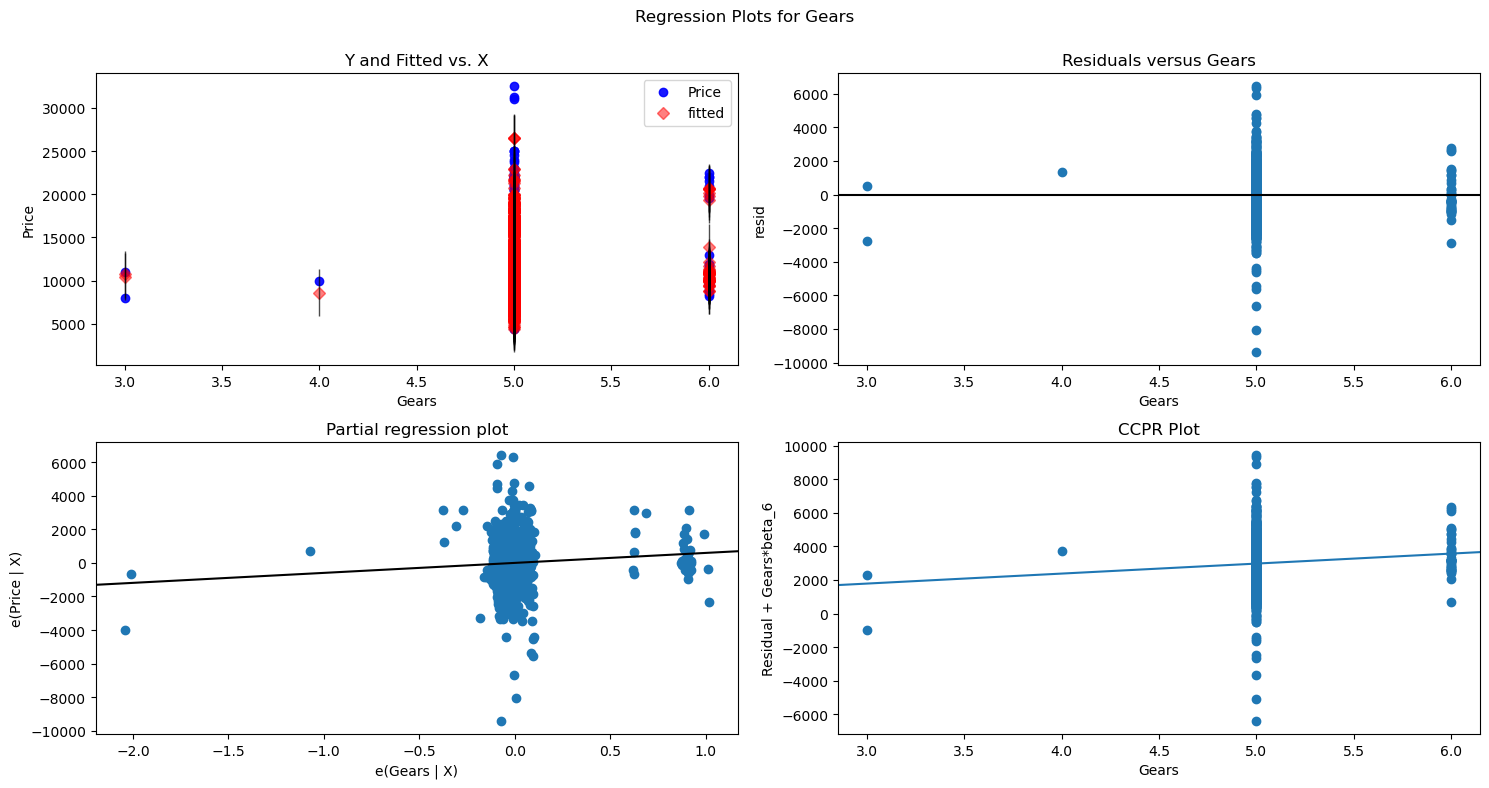

In [45]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


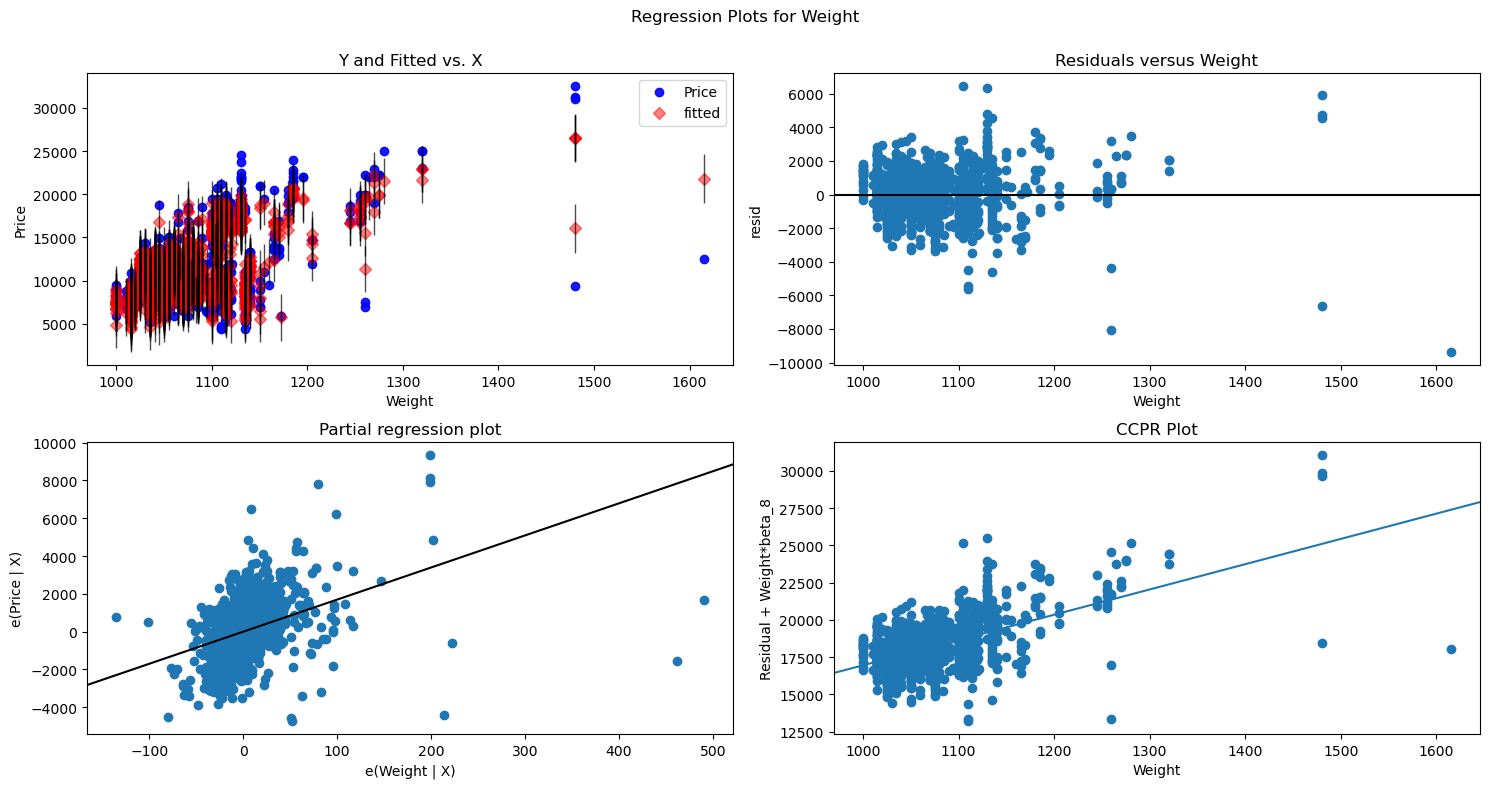

In [46]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

In [49]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

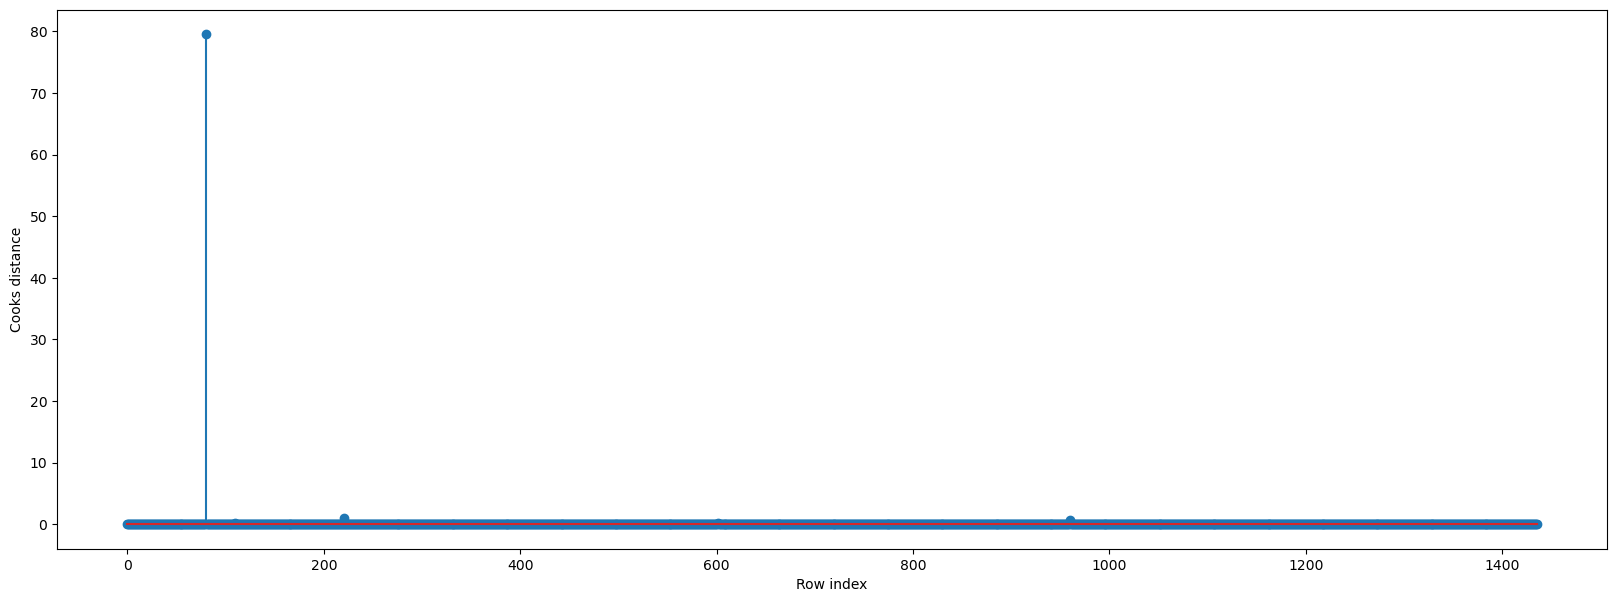

In [56]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [57]:
np.argmax(c),np.max(c)

(80, 79.52010624137121)

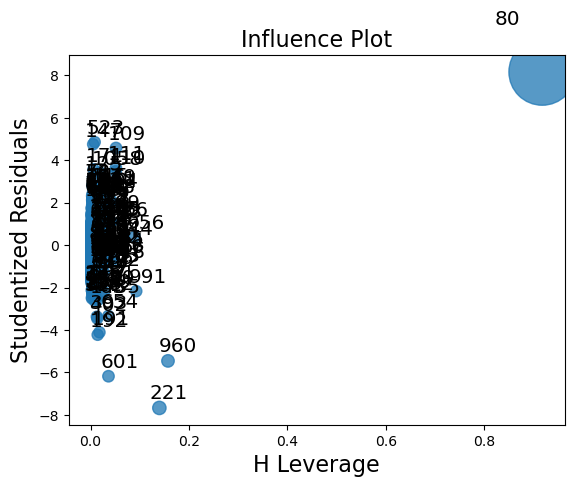

In [58]:
influence_plot(model)
plt.show()

In [59]:
k=data.shape[1]
n=data.shape[0]
leverage_cutoff=3*((k+1)/n)

In [60]:
leverage_cutoff

0.020891364902506964

In [68]:
data1[data1.index.isin([80,79])]

,index,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
79,81,82,TOYOTA Corolla 1.6 16V VVT I 5DR TERRA 4/5-Doors,17250,29,4,2002,20000,Petrol,110,...,1,1,1,0,0,1,1,0,0,0
80,82,83,TOYOTA Corolla 1.4 16V VVT I 5DR 4/5-Doors,15450,25,8,2002,17003,Petrol,97,...,0,0,1,0,0,1,1,0,0,0


In [62]:
data1.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [65]:
data_new = pd.read_csv('ToyotaCorolla.csv',encoding='latin')

In [67]:
data2=data_new.drop(data_new.index[[80,79]],axis=0).reset_index()

In [69]:
data2=data2.drop(['index'],axis=1)

In [74]:
final_m= smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data = data2).fit()

In [75]:
(final_m.rsquared,final_m.aic)

(0.8692433800620685, 24669.247833994687)

In [76]:
new_data1 = pd.DataFrame({'Age_08_04' :50,'KM' : 40000,'HP': 80,'cc': 20000,'Doors':5,'Gears':5,'Quarterly_Tax':200,'Weight': 10000},index=[1])

In [78]:
final_m.predict(new_data1)

1    144179.266697
dtype: float64

In [79]:
final_m.predict(data_new.iloc[0:8,])

0    16496.826584
1    16032.298570
2    16470.771515
3    16117.239961
4    15905.270439
5    15261.558791
6    16760.685940
7    16734.395507
dtype: float64